### Scaling Preprocessing Task
표정 분류  

**flow_from_dataframe()을 사용한다.**

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.densenet import preprocess_input

# 이미지 및 배치 크기 지정
IMAGE_SIZE = 64
BATCH_SIZE = 64

# 이미지 전처리 객체 생성
# 미리 전처리 함수를 지정하여 데이터를 로드할 때 자동 전처리 진행
idg = ImageDataGenerator(preprocessing_function=preprocess_input)

# 경로 지정
original_dir = './datasets/face/original/'
test_dir = './datasets/face/test/'

# 이미지 전처리
# 디렉토리에서 이미지를 가져와 배치로 변환
original_generator = idg.flow_from_directory(original_dir, 
                                             target_size=(IMAGE_SIZE, IMAGE_SIZE), 
                                             batch_size=BATCH_SIZE, 
                                             class_mode='categorical', 
                                             shuffle=True)

test_generator = idg.flow_from_directory(test_dir, 
                                             target_size=(IMAGE_SIZE, IMAGE_SIZE), 
                                             batch_size=BATCH_SIZE, 
                                             class_mode='categorical')

# 클래스 인덱스 출력
print(original_generator.class_indices)
print(test_generator.class_indices)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [2]:
# 타겟 고유의 값과 인덱스 번호를 가져온 후 위치 변경 후 dict으로 저장
target_name = {v: k for k, v in original_generator.class_indices.items()}
target_name

{0: 'angry',
 1: 'disgust',
 2: 'fear',
 3: 'happy',
 4: 'neutral',
 5: 'sad',
 6: 'surprise'}

In [3]:
# 각 데이터 세트의 타겟 이름을 저장
original_target_names = []
test_target_names = []

# 각 데이터 세트의 타겟 값을 가져오기
for target in original_generator.classes:
    # 타겟 고유의 값을 인덱스로 찾아 list에 저장
    original_target_names.append(target_name[target])

# 각 데이터 세트의 타겟 값을 가져오기
for target in test_generator.classes:
    # 타겟 고유의 값을 인덱스로 찾아 list에 저장
    test_target_names.append(target_name[target])

# 각 데이터 세트의 타겟 길이(개수) 반환
print(original_target_names.__len__(), test_target_names.__len__())

28709 7178


In [4]:
import pandas as pd

# 파일 경로와 타겟값을 가지고 새로운 데이터 프레임 생성
original_df = pd.DataFrame({'file_paths': original_generator.filepaths, 'target_names': original_target_names, 'targets': original_generator.classes})
# 경로 중 \\(역슬래시)로 되어 있는 부분을 /(슬래시)로 변경 
original_df.file_paths = original_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))

# 파일 경로와 타겟값을 가지고 새로운 데이터 프레임 생성
test_df = pd.DataFrame({'file_paths': test_generator.filepaths, 'target_names': test_target_names, 'targets': test_generator.classes})
# 경로 중 \\(역슬래시)로 되어 있는 부분을 /(슬래시)로 변경 
test_df.file_paths = test_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))

display(original_df)
display(test_df)

,file_paths,target_names,targets
0,./datasets/face/original/angry/Training_101184...,angry,0
1,./datasets/face/original/angry/Training_101204...,angry,0
2,./datasets/face/original/angry/Training_101313...,angry,0
3,./datasets/face/original/angry/Training_101615...,angry,0
4,./datasets/face/original/angry/Training_102183...,angry,0
...,...,...,...
28704,./datasets/face/original/surprise/Training_999...,surprise,6
28705,./datasets/face/original/surprise/Training_999...,surprise,6
28706,./datasets/face/original/surprise/Training_999...,surprise,6
28707,./datasets/face/original/surprise/Training_999...,surprise,6


,file_paths,target_names,targets
0,./datasets/face/test/angry/PrivateTest_1013136...,angry,0
1,./datasets/face/test/angry/PrivateTest_1030447...,angry,0
2,./datasets/face/test/angry/PrivateTest_1054527...,angry,0
3,./datasets/face/test/angry/PrivateTest_1059009...,angry,0
4,./datasets/face/test/angry/PrivateTest_1109992...,angry,0
...,...,...,...
7173,./datasets/face/test/surprise/PublicTest_98089...,surprise,6
7174,./datasets/face/test/surprise/PublicTest_98567...,surprise,6
7175,./datasets/face/test/surprise/PublicTest_98972...,surprise,6
7176,./datasets/face/test/surprise/PublicTest_99242...,surprise,6


In [5]:
from sklearn.model_selection import train_test_split

# 검증용 데이터 세트 분리
train_images, validation_images, train_targets, validation_targets = \
train_test_split(original_df.file_paths, 
                 original_df.targets, 
                 stratify=original_df.targets, 
                 test_size=0.2, 
                 random_state=124)

# 인덱스 번호를 대조하여 각 데이터 프레임 나누기
train_df = original_df.iloc[train_images.index].reset_index(drop=True)
validation_df = original_df.iloc[validation_images.index].reset_index(drop=True)

display(train_df)
display(validation_df)

,file_paths,target_names,targets
0,./datasets/face/original/sad/Training_76985291...,sad,5
1,./datasets/face/original/sad/Training_8377237.jpg,sad,5
2,./datasets/face/original/neutral/Training_2641...,neutral,4
3,./datasets/face/original/angry/Training_825253...,angry,0
4,./datasets/face/original/sad/Training_26404725...,sad,5
...,...,...,...
22962,./datasets/face/original/angry/Training_736778...,angry,0
22963,./datasets/face/original/sad/Training_96925171...,sad,5
22964,./datasets/face/original/happy/Training_541719...,happy,3
22965,./datasets/face/original/surprise/Training_272...,surprise,6


,file_paths,target_names,targets
0,./datasets/face/original/happy/Training_336979...,happy,3
1,./datasets/face/original/sad/Training_97858073...,sad,5
2,./datasets/face/original/neutral/Training_3419...,neutral,4
3,./datasets/face/original/happy/Training_406560...,happy,3
4,./datasets/face/original/neutral/Training_9109...,neutral,4
...,...,...,...
5737,./datasets/face/original/sad/Training_56944263...,sad,5
5738,./datasets/face/original/surprise/Training_504...,surprise,6
5739,./datasets/face/original/fear/Training_4560249...,fear,2
5740,./datasets/face/original/happy/Training_233273...,happy,3


In [6]:
import shutil
import os.path

# 데이터 세트 경로 지정
base_dir = './datasets/face/'

for filepath in train_df.file_paths:
    # 이미지 파일을 복사할 디렉터리의 경로 저장
    destination = base_dir + 'train/' + filepath[len(base_dir + '/original'):filepath.rindex('/')]

    # 디렉터리가 없는 경우 해당 디렉터리를 생성
    if not os.path.exists(destination):
        os.makedirs(destination)

    # 이미지 파일을 디렉터리로 복사
    shutil.copy2(filepath, destination)

In [7]:
import shutil
import os.path

# 데이터 세트 경로 지정
base_dir = './datasets/face/'

for filepath in validation_df.file_paths:
    # 이미지 파일을 복사할 디렉터리의 경로 저장
    destination = base_dir + 'validation/' + filepath[len(base_dir + '/original'):filepath.rindex('/')]

    # 디렉터리가 없는 경우 해당 디렉터리를 생성
    if not os.path.exists(destination):
        os.makedirs(destination)

    # 이미지 파일을 디렉터리로 복사
    shutil.copy2(filepath, destination)

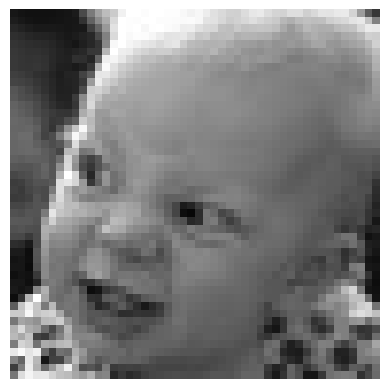

In [10]:
import cv2
import matplotlib.pyplot as plt

# RGB로 색상 형식을 변환하여 이미지 가져오기
image = cv2.cvtColor(cv2.imread(train_df.file_paths.iloc[22962]), cv2.COLOR_BGR2RGB)
# 이미지 시각화
plt.imshow(image)
# 축 제거
plt.axis('off')
# 출력
plt.show()

In [11]:
from tensorflow.keras.applications.xception import preprocess_input

# 이미지 및 배치 크기 지정
IMAGE_SIZE = 224
BATCH_SIZE = 64

# 이미지 전처리 객체 선언
train_generator = ImageDataGenerator(horizontal_flip=True, preprocessing_function=preprocess_input)
validation_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

# 이미지 전처리
# 디렉토리에서 이미지를 가져와 배치로 변환
# flow_from_dataframe에서 y_col에 들어갈 타겟 데이터는 문자열 타입만 가능하다.
train_flow = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='file_paths',
    y_col='target_names',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

validation_flow = validation_generator.flow_from_dataframe(
    dataframe=validation_df,
    x_col='file_paths',
    y_col='target_names',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_flow = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='file_paths',
    y_col='target_names',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# 클래스 인덱스 출력
print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)

Found 22967 validated image filenames belonging to 7 classes.
Found 5742 validated image filenames belonging to 7 classes.
Found 7178 validated image filenames belonging to 7 classes.
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [12]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception

# 모델 생성 함수 선언
# model_name: 사전 훈련 모델 이름, verbose: 모델 요약 출력 여부
def create_model(model_name='vgg16', verbose=False):
    # Input layer: 이미지 크기와 채널 수를 지정
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    # 주어진 모델 이름에 따라 사전 훈련된 모델을 선택하고 초기화
    if model_name == 'vgg16':
        # VGG16 모델 선택
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        # ResNet50V2 모델 선택
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        # Xception 모델 선택
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')

    # output layer: 모델 출력 층 
    x = model.output

    # 분류기
    # GlobalAveragePooling2D: 글로벌 평균 풀링 층을 추가하여 특성 맵의 공간 차원 축소
    x = GlobalAveragePooling2D()(x)
    # VGG16 모델 선택을 선택하지 않았다면 dropout 미진행
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)

    # hidden layer: 50개의 뉴런과 ReLU 활성화 함수 사용
    x = Dense(50, activation='relu')(x)

    # VGG16 모델 선택을 선택하지 않았다면 dropout 미진행
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)

    # output layer: 10개의 뉴런과 소프트맥스 활성화 함수를 사용하여 클래스 확률 출력
    output = Dense(10, activation='softmax', name='output')(x)

    # 모델 생성: 입력과 출력을 지정하여 모델 정의
    model = Model(inputs=input_tensor, outputs=output)

    # verbose가 True인 경우 모델 요약 출력
    if verbose:
        model.summary()
    
    return model

In [13]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

# 모델 생성 함수를 사용하여 모델 생성
# model_name='xception'로 Xception 모델 선택, verbose=True로 모델 요약 출력
model = create_model(model_name='xception', verbose=False)

# 모델 컴파일: 학습 프로세스 설정
# optimizer: 최적화 알고리즘, loss: 손실함수, metrics: 성능지표
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

In [14]:
import gc

# 메모리 해제 함수
gc.collect()

715

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# # weights 저장
# mcp_cb = ModelCheckpoint(
#     filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
#     monitor='val_loss',
#     save_best_only=False,
#     save_weights_only=True,
#     mode='min'
# )

# 일정 기간 동안 성능이 개선되지 않을 시 학습률 동적으로 감소
rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

# 일정 기간 동안 성능이 개선되지 않을 시 학습 조기 중단
ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

In [16]:
# 반복횟수 지정
# 대문자로 상수를 표기하면 다른 부분에서 변경되지 않는다는 것을 의미
N_EPOCHS = 10

# 훈련
history = model.fit(train_flow, 
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[rlr_cb, ely_cb])

Epoch 1/10


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()

KeyboardInterrupt



In [ ]:
# 평가
model.evaluate(test_flow)

In [ ]:
import matplotlib.pyplot as plt

# 학습과정 지표를 그래프화
def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)